<div style="padding: 35px;color:white;margin:10;font-size:170%;text-align:left;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://images.rawpixel.com/image_social_landscape/cHJpdmF0ZS9sci9pbWFnZXMvd2Vic2l0ZS8yMDIyLTA1L3Vwd2s2MTcxMzA4Ni13aWtpbWVkaWEtaW1hZ2Utam9iNTcyLTEuanBn.jpg)">
  <h1>1. INTRODUÇÃO</h1>
</div>

**Caso:** Criação de uma nova empresa de torrefação de grãos.

**Problema:** Encontrar os fatores relacionados à origem do grão que influenciam na qualidade da bebida.

É bem raro encontrar uma pessoa que trabalhe com tecnologia e não aprecie o _boost_ concedido por um bom cafézinho. Sendo assim, não há motivos de não se utilizar da tecnologia para conseguir um _boost_ no mercado.
E como todo bom café começa pelo grão, vamos tentar entender quais fatores podem influenciar mais na qualidade da bebida.

Então, pegue um café (ou um chá) e vamos nessa!

In [1]:
# imports - básico para qualquer trabalho de data science
import pandas as pd
import numpy as np

<div style="padding: 35px;color:while;margin:10;font-size:170%;text-align:left;display:fill;border-radius:10px;overflow:hidden;background-image: url('./dataset-cover.jpg'); background-repeat:no-repeat">
  <h1>2. DATASET</h1>
</div>

Para estudarmos o problema, e começarmos a entender um pouco do problema, vamos utilizar um dataset encontrado no Kaggle, focado em cafés da especie Arábica.
O dataset pode ser encontrado na pasta `datasets` no projeto, ou [Nesse link!](https://www.kaggle.com/datasets/fatihb/coffee-quality-data-cqi)

In [2]:
# lendo o dataset

df_base = pd.read_csv('./dataset/df_arabica_clean.csv')

df_base.head()

,Unnamed: 0,ID,Country of Origin,Farm Name,Lot Number,Mill,ICO Number,Company,Altitude,Region,...,Total Cup Points,Moisture Percentage,Category One Defects,Quakers,Color,Category Two Defects,Expiration,Certification Body,Certification Address,Certification Contact
0,0,0,Colombia,Finca El Paraiso,CQU2022015,Finca El Paraiso,NaN,Coffee Quality Union,1700-1930,"Piendamo,Cauca",...,89.33,11.8,0,0,green,3,"September 21st, 2023",Japan Coffee Exchange,"〒413-0002 静岡県熱海市伊豆山１１７３−５８ 1173-58 Izusan, Ata...",松澤 宏樹 Koju Matsuzawa - +81(0)9085642901
1,1,1,Taiwan,Royal Bean Geisha Estate,"The 2022 Pacific Rim Coffee Summit,T037",Royal Bean Geisha Estate,NaN,Taiwan Coffee Laboratory,1200,Chiayi,...,87.58,10.5,0,0,blue-green,0,"November 15th, 2023",Taiwan Coffee Laboratory 台灣咖啡研究室,"QAHWAH CO., LTD 4F, No. 225, Sec. 3, Beixin Rd...","Lin, Jen-An Neil 林仁安 - 886-289116612"
2,2,2,Laos,OKLAO coffee farms,"The 2022 Pacific Rim Coffee Summit,LA01",oklao coffee processing plant,NaN,Taiwan Coffee Laboratory,1300,Laos Borofen Plateau,...,87.42,10.4,0,0,yellowish,2,"November 15th, 2023",Taiwan Coffee Laboratory 台灣咖啡研究室,"QAHWAH CO., LTD 4F, No. 225, Sec. 3, Beixin Rd...","Lin, Jen-An Neil 林仁安 - 886-289116612"
3,3,3,Costa Rica,La Cumbre,CQU2022017,La Montana Tarrazu MIll,NaN,Coffee Quality Union,1900,"Los Santos,Tarrazu",...,87.17,11.8,0,0,green,0,"September 21st, 2023",Japan Coffee Exchange,"〒413-0002 静岡県熱海市伊豆山１１７３−５８ 1173-58 Izusan, Ata...",松澤 宏樹 Koju Matsuzawa - +81(0)9085642901
4,4,4,Colombia,Finca Santuario,CQU2023002,Finca Santuario,NaN,Coffee Quality Union,1850-2100,"Popayan,Cauca",...,87.08,11.6,0,2,yellow-green,2,"March 5th, 2024",Japan Coffee Exchange,"〒413-0002 静岡県熱海市伊豆山１１７３−５８ 1173-58 Izusan, Ata...",松澤 宏樹 Koju Matsuzawa - +81(0)9085642901


Vamos dar uma olhada no tipo de informação de cada coluna, e na completude dos dados.

In [3]:
df_base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             207 non-null    int64  
 1   ID                     207 non-null    int64  
 2   Country of Origin      207 non-null    object 
 3   Farm Name              205 non-null    object 
 4   Lot Number             206 non-null    object 
 5   Mill                   204 non-null    object 
 6   ICO Number             75 non-null     object 
 7   Company                207 non-null    object 
 8   Altitude               206 non-null    object 
 9   Region                 205 non-null    object 
 10  Producer               206 non-null    object 
 11  Number of Bags         207 non-null    int64  
 12  Bag Weight             207 non-null    object 
 13  In-Country Partner     207 non-null    object 
 14  Harvest Year           207 non-null    object 
 15  Gradin

## 2.1. Removendo colunas que não serão utilizadas

Começaremos por remover algumas colunas com informações que não tem servitude direta para os métodos que pretendemos aplicar nesse primeiro momento.

In [4]:
# removendo colunas não relacionadas
drop_columns = ['Unnamed: 0', 'ID', 'Lot Number', 'ICO Number',
                'Mill', 'Producer', 'Number of Bags', 'Bag Weight',
                'In-Country Partner', 'Grading Date', 'Owner',
                'Expiration', 'Certification Body',
                'Certification Address', 'Certification Contact']

df_clean = df_base.drop(columns=drop_columns, axis=1)

df_clean.head()

,Country of Origin,Farm Name,Company,Altitude,Region,Harvest Year,Variety,Status,Processing Method,Aroma,...,Clean Cup,Sweetness,Overall,Defects,Total Cup Points,Moisture Percentage,Category One Defects,Quakers,Color,Category Two Defects
0,Colombia,Finca El Paraiso,Coffee Quality Union,1700-1930,"Piendamo,Cauca",2021 / 2022,Castillo,Completed,Double Anaerobic Washed,8.58,...,10.0,10.0,8.58,0.0,89.33,11.8,0,0,green,3
1,Taiwan,Royal Bean Geisha Estate,Taiwan Coffee Laboratory,1200,Chiayi,2021 / 2022,Gesha,Completed,Washed / Wet,8.50,...,10.0,10.0,8.50,0.0,87.58,10.5,0,0,blue-green,0
2,Laos,OKLAO coffee farms,Taiwan Coffee Laboratory,1300,Laos Borofen Plateau,2021 / 2022,Java,Completed,Semi Washed,8.33,...,10.0,10.0,8.33,0.0,87.42,10.4,0,0,yellowish,2
3,Costa Rica,La Cumbre,Coffee Quality Union,1900,"Los Santos,Tarrazu",2022,Gesha,Completed,Washed / Wet,8.08,...,10.0,10.0,8.25,0.0,87.17,11.8,0,0,green,0
4,Colombia,Finca Santuario,Coffee Quality Union,1850-2100,"Popayan,Cauca",2022,Red Bourbon,Completed,"Honey,Mossto",8.33,...,10.0,10.0,8.25,0.0,87.08,11.6,0,2,yellow-green,2


## 2.2. Limpando os valores no dataset

Ainda assim, precisamos garantir que os valores contidos nas colunas que utilizaremos estão bem organizados e consistentes.
Vamos começar criando uma função simples para nos mostrar um relatório dos valores contidos em cada coluna.

In [5]:
import pandas as pd

def unique_values_report(df: pd.DataFrame):
    columns = df.columns.to_list()

    for col in columns:
        col_values = df[col].value_counts(normalize=True)
        print("===========")
        print(col_values)
        print("===========")

In [6]:
# E vamos pra várias linhas de relatório
unique_values_report(df_clean)

Country of Origin
Taiwan                          0.294686
Guatemala                       0.101449
Colombia                        0.091787
Honduras                        0.062802
Thailand                        0.057971
Ethiopia                        0.053140
Brazil                          0.048309
Costa Rica                      0.038647
Nicaragua                       0.033816
El Salvador                     0.033816
Tanzania, United Republic Of    0.028986
United States (Hawaii)          0.024155
Mexico                          0.019324
Peru                            0.019324
Vietnam                         0.019324
Uganda                          0.014493
Indonesia                       0.014493
Laos                            0.014493
Panama                          0.009662
Kenya                           0.009662
Madagascar                      0.004831
Myanmar                         0.004831
Name: proportion, dtype: float64
Farm Name
Doi Tung Development Project    0.034

### 2.2.1 Definindo o processo de limpeza

Algumas colunas, que serão utilizadas para análise posterior do problema, precisam ter os dados limpos.
São elas:
| Coluna | Problema | Solução |
| :---: | :---: | :---: |
| Altitude | Valores Múltiplos na mesma coluna | Adoção da média dos valores múltiplos |
| Harvest Year | Valores Múltiplos na mesma coluna | Separação em 2 colunas (Initial Harvest Year, Final Harvest Year) |
| Processing Method | Valores com erros de digitação ou padronização | Padronização em direção aos valores mais frequentes |
| Color | Valores com erros de digitação ou padronização | Padronização em direção aos valores mais frequentes |


### ALTITUDE

In [7]:
df_clean['Altitude'].unique()

array(['1700-1930', '1200', '1300', '1900', '1850-2100', '1668', '1250',
       '1400-1700', '1800-2200', '2000', '1900-2000', '1850', '1100',
       '1900-2100', '1570-1600', '850', '1500-1700', '1350', '1060',
       '600', '150-250', '668', '1950', '2150 - 2350', '1700', '650',
       '1600-1900', '300-500', '1000', '800', '1905', '150', '1600',
       '4700', '350-400', '230', '1750', '1654', '1400', '4895',
       '200-300', '700', '1450', '520', '1368', '1943', '400',
       '1300-1400', '2361', '1500', '2100', '1250-1350', '1500-1600',
       '1800', '1600-1750', '1411', '4895 A 5650', '400-600', nan,
       '200-400', '1470', '250-400', '250-300', '1200 - 1580',
       '1400 - 1900', '1280-1325', '300', '750', '1300-1500', '950',
       '1100-1200', '1390', '340', '1200 - 1300', '1650', '1280', '900',
       '165', '465', '640', '1340', '139', '1200-1350', '1040', '140',
       '1500-1950', '460', '500', '800-1200', '1350-1550', '1200~1600',
       '5400', '900-1000', '1574', '

In [8]:
null_entries = df_clean['Altitude'].isnull()
df_null = df_clean[null_entries]

df_null

,Country of Origin,Farm Name,Company,Altitude,Region,Harvest Year,Variety,Status,Processing Method,Aroma,...,Clean Cup,Sweetness,Overall,Defects,Total Cup Points,Moisture Percentage,Category One Defects,Quakers,Color,Category Two Defects
105,Colombia,NaN,Coffee Quality Institute,NaN,NaN,2022,NaN,Completed,NaN,7.83,...,10.0,10.0,7.67,0.0,83.67,12.4,1,0,greenish,9


Começando pela **Altitude**, encontramos um único registro que não possui valores. Vamos tentar entender como lidar com ele. Já que a única informação que temos até então é que o grão tem origem na Colombia, vamos dar uma olhada nesse conjunto.

In [9]:
colombian_coffee = df_clean[df_clean['Country of Origin'] == 'Colombia']
colombian_coffee

,Country of Origin,Farm Name,Company,Altitude,Region,Harvest Year,Variety,Status,Processing Method,Aroma,...,Clean Cup,Sweetness,Overall,Defects,Total Cup Points,Moisture Percentage,Category One Defects,Quakers,Color,Category Two Defects
0,Colombia,Finca El Paraiso,Coffee Quality Union,1700-1930,"Piendamo,Cauca",2021 / 2022,Castillo,Completed,Double Anaerobic Washed,8.58,...,10.0,10.0,8.58,0.0,89.33,11.8,0,0,green,3
4,Colombia,Finca Santuario,Coffee Quality Union,1850-2100,"Popayan,Cauca",2022,Red Bourbon,Completed,"Honey,Mossto",8.33,...,10.0,10.0,8.25,0.0,87.08,11.6,0,2,yellow-green,2
14,Colombia,La Gaitania,Taiwan Coffee Laboratory,1850,tolima,2021 / 2022,Caturra,Completed,Washed / Wet,8.08,...,10.0,10.0,8.00,0.0,86.17,10.6,0,0,green,0
23,Colombia,El Diamante,Coffee Quality Union,1350,Quindio,2022,Castillo Paraguaycito,Completed,NaN,8.08,...,10.0,10.0,8.00,0.0,85.67,11.3,0,0,brownish,2
78,Colombia,Asociacion Tayronaca,Sucafina NA,2100,Sierra Nevada de Santa Marta,2021 / 2022,Castillo and Colombia blend,Completed,Washed / Wet,7.75,...,10.0,10.0,7.83,0.0,84.33,11.6,0,0,green,1
92,Colombia,COO,InterAmerican Coffee,1400-1700,Huila,2022,Caturra,Completed,Washed / Wet,7.67,...,10.0,10.0,7.67,0.0,84.00,13.3,0,2,green,3
97,Colombia,NaN,Marubeni Corporation,1411,Pereira,2022 / 2023,NaN,Completed,Washed / Wet,7.67,...,10.0,10.0,7.67,0.0,83.83,11.9,0,1,green,1
101,Colombia,N / A,ECOM COLOMBIA,1700,Cauca,2022 / 2023,Caturra,Completed,Washed / Wet,7.92,...,10.0,10.0,7.58,0.0,83.83,12.1,2,5,green,5
103,Colombia,La Gallera,Taiwan Coffee Laboratory,1800,Tolima,2022,Bourbon Sidra,Completed,Pulped natural / honey,7.67,...,10.0,10.0,7.58,0.0,83.75,10.6,0,0,greenish,1
105,Colombia,NaN,Coffee Quality Institute,NaN,NaN,2022,NaN,Completed,NaN,7.83,...,10.0,10.0,7.67,0.0,83.67,12.4,1,0,greenish,9


Não há informações que ajudem a identificar uma região aproximada para o café **105**.
Utilizaremos então a **média geral dos valores** para inserir no lugar do valor nulo.

Em seguida. Vamos definir uma **função** para limpar os dados. Em resumo, faremos:
- Vamos retirar os espaços contidos nos valores da coluna.
- Substituiremos as ocorrências do caracter `~` por `-`.
- Substituiremos as ocorrências do caracter `A` por `-`.
- Caso o valor possua o caracter `-` (o que indica que foram inseridos dois valores), vamos assumir que esses representam a menor e maior altitude daquele registro.
- E então atribuiremos a média como valor para esses casos.

In [10]:
def clean_altitude_value(range_value):
   if isinstance(range_value, str):
         range_value = range_value.replace(" ", "")
         range_value = range_value.replace("~", "-")
         range_value = range_value.replace("A", "-")
         if '-' in range_value:
            try:
               start, end = range_value.split('-')
               start = int(start)
               end = int(end)
               return (start + end) / 2
            except ValueError:
               return np.nan
         else:
            try:
               return int(range_value)
            except ValueError:
               return np.nan
   else:
         return range_value

Limpando o **subgrupo** de cafés colombianos para poder acharmos a média:

In [11]:
colombian_coffee.drop(105, inplace=True)
colombian_coffee['Altitude'] = colombian_coffee['Altitude'].apply(clean_altitude_value)
colombian_coffee

C:\Users\bruno\AppData\Local\Temp\ipykernel_7448\4068912856.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  colombian_coffee.drop(105, inplace=True)
C:\Users\bruno\AppData\Local\Temp\ipykernel_7448\4068912856.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  colombian_coffee['Altitude'] = colombian_coffee['Altitude'].apply(clean_altitude_value)


,Country of Origin,Farm Name,Company,Altitude,Region,Harvest Year,Variety,Status,Processing Method,Aroma,...,Clean Cup,Sweetness,Overall,Defects,Total Cup Points,Moisture Percentage,Category One Defects,Quakers,Color,Category Two Defects
0,Colombia,Finca El Paraiso,Coffee Quality Union,1815.0,"Piendamo,Cauca",2021 / 2022,Castillo,Completed,Double Anaerobic Washed,8.58,...,10.0,10.0,8.58,0.0,89.33,11.8,0,0,green,3
4,Colombia,Finca Santuario,Coffee Quality Union,1975.0,"Popayan,Cauca",2022,Red Bourbon,Completed,"Honey,Mossto",8.33,...,10.0,10.0,8.25,0.0,87.08,11.6,0,2,yellow-green,2
14,Colombia,La Gaitania,Taiwan Coffee Laboratory,1850.0,tolima,2021 / 2022,Caturra,Completed,Washed / Wet,8.08,...,10.0,10.0,8.00,0.0,86.17,10.6,0,0,green,0
23,Colombia,El Diamante,Coffee Quality Union,1350.0,Quindio,2022,Castillo Paraguaycito,Completed,NaN,8.08,...,10.0,10.0,8.00,0.0,85.67,11.3,0,0,brownish,2
78,Colombia,Asociacion Tayronaca,Sucafina NA,2100.0,Sierra Nevada de Santa Marta,2021 / 2022,Castillo and Colombia blend,Completed,Washed / Wet,7.75,...,10.0,10.0,7.83,0.0,84.33,11.6,0,0,green,1
92,Colombia,COO,InterAmerican Coffee,1550.0,Huila,2022,Caturra,Completed,Washed / Wet,7.67,...,10.0,10.0,7.67,0.0,84.00,13.3,0,2,green,3
97,Colombia,NaN,Marubeni Corporation,1411.0,Pereira,2022 / 2023,NaN,Completed,Washed / Wet,7.67,...,10.0,10.0,7.67,0.0,83.83,11.9,0,1,green,1
101,Colombia,N / A,ECOM COLOMBIA,1700.0,Cauca,2022 / 2023,Caturra,Completed,Washed / Wet,7.92,...,10.0,10.0,7.58,0.0,83.83,12.1,2,5,green,5
103,Colombia,La Gallera,Taiwan Coffee Laboratory,1800.0,Tolima,2022,Bourbon Sidra,Completed,Pulped natural / honey,7.67,...,10.0,10.0,7.58,0.0,83.75,10.6,0,0,greenish,1
114,Colombia,La fortaleza,Cafe Colsuaves,1700.0,Popayán Cauca,2022,Caturra,Completed,Washed / Wet,7.75,...,10.0,10.0,7.58,0.0,83.50,12.2,0,0,bluish-green,2


In [12]:
colombian_mean_altitude = colombian_coffee['Altitude'].mean()
colombian_mean_altitude

1620.2777777777778

E com esse valor, aplicaremos ao nosso conjunto de dados para terminar a limpeza da coluna.

In [13]:
df_clean['Altitude'].fillna(colombian_mean_altitude, inplace=True)
df_clean['Altitude'] = df_clean['Altitude'].apply(clean_altitude_value)

C:\Users\bruno\AppData\Local\Temp\ipykernel_7448\1642097162.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean['Altitude'].fillna(colombian_mean_altitude, inplace=True)


In [14]:
df_clean['Altitude'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 207 entries, 0 to 206
Series name: Altitude
Non-Null Count  Dtype  
--------------  -----  
207 non-null    float64
dtypes: float64(1)
memory usage: 1.7 KB


Parece ter dado certo. Pega mais um cafezinho e vamos pra próxima.

### ANO DE COLHEITA

In [15]:
df_clean['Harvest Year'].unique()

array(['2021 / 2022', '2022', '2022 / 2023', '2021', '2017 / 2018',
       '2018 / 2019', '2023'], dtype=object)

A lógica por detrás da limpeza desses dados é bem próxima à que aplicamos para a Altitude. Vamos andar um pouco mais rapidinho por aqui para chegar à parte interessante.

In [16]:
df_clean[['Initial Harvest Year', 'Final Harvest Year']] = df_clean['Harvest Year'].str.split('/', expand=True)

df_clean['Final Harvest Year'].fillna(df_clean['Initial Harvest Year'], inplace=True)

df_clean['Initial Harvest Year'] = df_clean['Initial Harvest Year'].str.replace(r'\D', '', regex=True).astype('int')
df_clean['Final Harvest Year'] = df_clean['Final Harvest Year'].str.replace(r'\D', '', regex=True).astype('int')

df_clean.drop(columns='Harvest Year', inplace=True)

df_clean.head(15)

C:\Users\bruno\AppData\Local\Temp\ipykernel_7448\3609895753.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean['Final Harvest Year'].fillna(df_clean['Initial Harvest Year'], inplace=True)


,Country of Origin,Farm Name,Company,Altitude,Region,Variety,Status,Processing Method,Aroma,Flavor,...,Overall,Defects,Total Cup Points,Moisture Percentage,Category One Defects,Quakers,Color,Category Two Defects,Initial Harvest Year,Final Harvest Year
0,Colombia,Finca El Paraiso,Coffee Quality Union,1815.0,"Piendamo,Cauca",Castillo,Completed,Double Anaerobic Washed,8.58,8.50,...,8.58,0.0,89.33,11.8,0,0,green,3,2021,2022
1,Taiwan,Royal Bean Geisha Estate,Taiwan Coffee Laboratory,1200.0,Chiayi,Gesha,Completed,Washed / Wet,8.50,8.50,...,8.50,0.0,87.58,10.5,0,0,blue-green,0,2021,2022
2,Laos,OKLAO coffee farms,Taiwan Coffee Laboratory,1300.0,Laos Borofen Plateau,Java,Completed,Semi Washed,8.33,8.42,...,8.33,0.0,87.42,10.4,0,0,yellowish,2,2021,2022
3,Costa Rica,La Cumbre,Coffee Quality Union,1900.0,"Los Santos,Tarrazu",Gesha,Completed,Washed / Wet,8.08,8.17,...,8.25,0.0,87.17,11.8,0,0,green,0,2022,2022
4,Colombia,Finca Santuario,Coffee Quality Union,1975.0,"Popayan,Cauca",Red Bourbon,Completed,"Honey,Mossto",8.33,8.33,...,8.25,0.0,87.08,11.6,0,2,yellow-green,2,2022,2022
5,Guatemala,La Colina,Taiwan Coffee Laboratory,1668.0,Chimaltenango,Gesha,Completed,Washed / Wet,8.33,8.33,...,8.25,0.0,87.00,10.7,0,0,green,2,2022,2022
6,Taiwan,野牡丹咖啡莊園 Melastoma Coffee Estate,Taiwan Coffee Laboratory,1250.0,Chiayi,Gesha,Completed,Washed / Wet,8.33,8.17,...,8.25,0.0,86.92,9.1,0,0,green,0,2021,2022
7,Taiwan,七彩琉璃咖啡莊園 Chi Tsai Liu Li Ecological Farm,Taiwan Coffee Laboratory,1200.0,Chiayi,Sl34+Gesha,Completed,Natural / Dry,8.25,8.25,...,8.08,0.0,86.75,10.0,0,0,yellow green,1,2021,2022
8,Taiwan,亮軒咖啡莊園 Liang Xuan Coffee Farm,Taiwan Coffee Laboratory,1250.0,Chiayi,SL34,Completed,Washed / Wet,8.08,8.08,...,8.25,0.0,86.67,10.8,0,0,greenish,0,2021,2022
9,"Tanzania, United Republic Of",MASHIMA AMCOS,DORMAN (T) LIMITED,1550.0,KILIMANJARO,Bourbon,Completed,Washed / Wet,8.08,8.17,...,8.00,0.0,86.50,11.0,0,0,greenish,0,2022,2023


### MÉTODO DE PROCESSAMENTO

In [17]:
df_clean['Processing Method'].unique()

array(['Double Anaerobic Washed', 'Washed / Wet', 'Semi Washed',
       'Honey,Mossto', 'Natural / Dry', 'Pulped natural / honey', nan,
       'Double Carbonic Maceration / Natural', 'Wet Hulling',
       'Anaerobico 1000h', 'SEMI-LAVADO'], dtype=object)

In [18]:
df_clean['Processing Method'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 207 entries, 0 to 206
Series name: Processing Method
Non-Null Count  Dtype 
--------------  ----- 
202 non-null    object
dtypes: object(1)
memory usage: 1.7+ KB


Aqui, percebemos que temos tanto alguns valores não preenchidos, como alguns preenchimentos fora do padrão.

Além disso, após as primeiras fases do estudo, acabamos precisando voltar aqui e re-atribuir alguns dos valores para grupos maiores.

In [19]:
null_entries = df_clean['Processing Method'].isnull()
df_null = df_clean[null_entries]

df_null

,Country of Origin,Farm Name,Company,Altitude,Region,Variety,Status,Processing Method,Aroma,Flavor,...,Overall,Defects,Total Cup Points,Moisture Percentage,Category One Defects,Quakers,Color,Category Two Defects,Initial Harvest Year,Final Harvest Year
23,Colombia,El Diamante,Coffee Quality Union,1350.000000,Quindio,Castillo Paraguaycito,Completed,NaN,8.08,8.00,...,8.00,0.0,85.67,11.3,0,0,brownish,2,2022,2022
44,Taiwan,愛姬咖啡莊園iGfarm,Taiwan Coffee Laboratory,150.000000,壽豐鄉Shoufeng Township,Typica,Completed,NaN,7.92,8.00,...,7.83,0.0,85.00,10.9,0,0,green,0,2021,2022
51,Indonesia,PT Indo CafCo North Sumatera,InterAmerican Coffee,1200.000000,Aceh Tengah,Catimor,Completed,NaN,7.83,7.92,...,7.83,0.0,84.83,11.9,0,3,bluish-green,2,2022,2022
105,Colombia,NaN,Coffee Quality Institute,1620.277778,NaN,NaN,Completed,NaN,7.83,7.75,...,7.67,0.0,83.67,12.4,1,0,greenish,9,2022,2022
143,Taiwan,嵩岳咖啡莊園,宸嶧國際有限公司,1200.000000,"Shibi, Gukeng Township, Yunlin County 郵遞區號 , T...",Gesha,Completed,NaN,7.67,7.50,...,7.58,0.0,82.92,10.2,0,0,yellow-green,0,2022,2022


In [20]:
df_clean['Processing Method'].value_counts(normalize=True)

Processing Method
Washed / Wet                            0.613861
Natural / Dry                           0.227723
Pulped natural / honey                  0.123762
Double Anaerobic Washed                 0.004950
Semi Washed                             0.004950
Honey,Mossto                            0.004950
Double Carbonic Maceration / Natural    0.004950
Wet Hulling                             0.004950
Anaerobico 1000h                        0.004950
SEMI-LAVADO                             0.004950
Name: proportion, dtype: float64

Aqui, faremos o seguinte:
- Valores não preenchidos serão tratados como Secagem Natural (`Natural / Dry`)
- Os outros valores, serão agrupados conforme as listas vistas nas linhas abaixo, mantendo os 3 macro-grupos de:
  - **Lavado** (_Washed / Wet_)
  - **Seco** (_Natural / Dry_)
  - **Polpa** (_Pulped natural / Honey_)

In [21]:
df_clean['Processing Method'].fillna('Natural / Dry', inplace=True)

df_clean['Processing Method'].replace(['SEMI-LAVADO', 'Semi Washed', 'Wet Hulling', 'Double Anaerobic Washed'], 'Washed / Wet', inplace=True)
df_clean['Processing Method'].replace(['Double Carbonic Maceration / Natural'], 'Natural / Dry', inplace=True)
df_clean['Processing Method'].replace(['Pulped natural / honey', 'Anaerobico 1000h', 'Honey,Mossto'], 'Pulped natural / Honey', inplace=True)

df_clean['Processing Method'].value_counts(normalize=True)

C:\Users\bruno\AppData\Local\Temp\ipykernel_7448\3624987792.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean['Processing Method'].fillna('Natural / Dry', inplace=True)


Processing Method
Washed / Wet              0.618357
Natural / Dry             0.251208
Pulped natural / Honey    0.130435
Name: proportion, dtype: float64

### COR (Do Grão)

In [22]:
df_clean['Color'].unique()

array(['green', 'blue-green', 'yellowish', 'yellow-green', 'yellow green',
       'greenish', 'brownish', 'yellow- green', 'browish-green',
       'bluish-green', 'pale yellow', 'yello-green'], dtype=object)

In [23]:
df_clean['Color'].value_counts(normalize=True)

Color
green            0.487923
greenish         0.173913
bluish-green     0.101449
blue-green       0.057971
yellow-green     0.048309
brownish         0.043478
pale yellow      0.028986
yellow green     0.024155
yellowish        0.019324
yellow- green    0.004831
browish-green    0.004831
yello-green      0.004831
Name: proportion, dtype: float64

Aqui vemos basicamente alguns problemas de digitação e falta de padronização. Fácil de resolver.

In [24]:
df_clean['Color'].replace(['yello-green', 'yellow- green', 'yellow green', 'yellowish'], 'yellow-green', inplace=True)
df_clean['Color'].replace(['browish-green'], 'brownish', inplace=True)
df_clean['Color'].replace(['blue-green'], 'bluish-green', inplace=True)

df_clean['Color'].value_counts(normalize=True)

C:\Users\bruno\AppData\Local\Temp\ipykernel_7448\4188160176.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean['Color'].replace(['yello-green', 'yellow- green', 'yellow green', 'yellowish'], 'yellow-green', inplace=True)


Color
green           0.487923
greenish        0.173913
bluish-green    0.159420
yellow-green    0.101449
brownish        0.048309
pale yellow     0.028986
Name: proportion, dtype: float64

In [25]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Country of Origin     207 non-null    object 
 1   Farm Name             205 non-null    object 
 2   Company               207 non-null    object 
 3   Altitude              207 non-null    float64
 4   Region                205 non-null    object 
 5   Variety               201 non-null    object 
 6   Status                207 non-null    object 
 7   Processing Method     207 non-null    object 
 8   Aroma                 207 non-null    float64
 9   Flavor                207 non-null    float64
 10  Aftertaste            207 non-null    float64
 11  Acidity               207 non-null    float64
 12  Body                  207 non-null    float64
 13  Balance               207 non-null    float64
 14  Uniformity            207 non-null    float64
 15  Clean Cup             2

<div style="padding: 35px;color:white;margin:10;font-size:170%;text-align:left;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://images.pexels.com/photos/942802/pexels-photo-942802.jpeg?auto=compress&cs=tinysrgb&w=1260&h=750&dpr=1)">
  <h1>3. Visualizando</h1>
</div>

In [26]:
# Importando algumas ferramentas para criação de gráficos
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [27]:
# Vamos rever nosso dataset (já limpo)
df_coffee = df_clean.copy()

df_coffee.head()

,Country of Origin,Farm Name,Company,Altitude,Region,Variety,Status,Processing Method,Aroma,Flavor,...,Overall,Defects,Total Cup Points,Moisture Percentage,Category One Defects,Quakers,Color,Category Two Defects,Initial Harvest Year,Final Harvest Year
0,Colombia,Finca El Paraiso,Coffee Quality Union,1815.0,"Piendamo,Cauca",Castillo,Completed,Washed / Wet,8.58,8.50,...,8.58,0.0,89.33,11.8,0,0,green,3,2021,2022
1,Taiwan,Royal Bean Geisha Estate,Taiwan Coffee Laboratory,1200.0,Chiayi,Gesha,Completed,Washed / Wet,8.50,8.50,...,8.50,0.0,87.58,10.5,0,0,bluish-green,0,2021,2022
2,Laos,OKLAO coffee farms,Taiwan Coffee Laboratory,1300.0,Laos Borofen Plateau,Java,Completed,Washed / Wet,8.33,8.42,...,8.33,0.0,87.42,10.4,0,0,yellow-green,2,2021,2022
3,Costa Rica,La Cumbre,Coffee Quality Union,1900.0,"Los Santos,Tarrazu",Gesha,Completed,Washed / Wet,8.08,8.17,...,8.25,0.0,87.17,11.8,0,0,green,0,2022,2022
4,Colombia,Finca Santuario,Coffee Quality Union,1975.0,"Popayan,Cauca",Red Bourbon,Completed,Pulped natural / Honey,8.33,8.33,...,8.25,0.0,87.08,11.6,0,2,yellow-green,2,2022,2022


Começaremos tentando entender quais países estão mais presentes nesses dados.

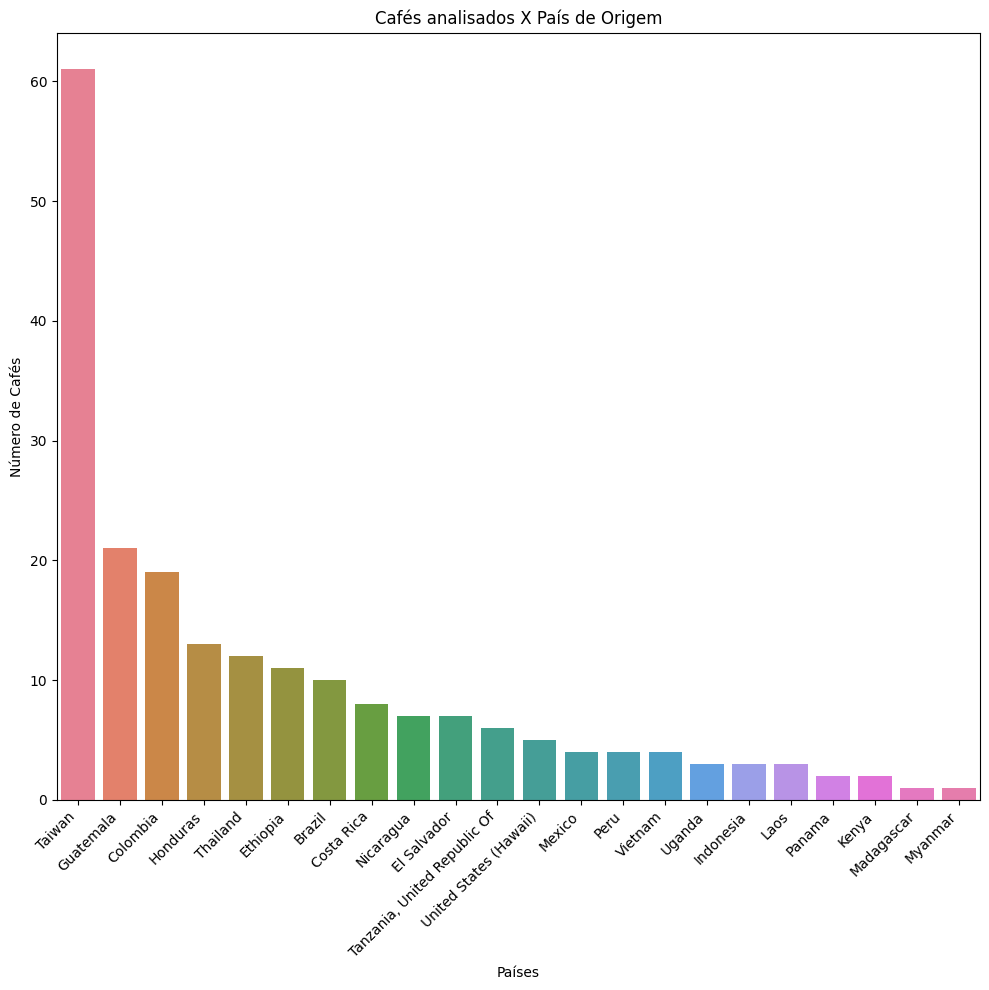

In [28]:
country = df_coffee['Country of Origin'].value_counts()
country_names = country.index

coffee_count = [country[index] for index in country_names]

plt.figure(figsize=(10, 10))

ax = sns.barplot(
    x = country_names,
    y = coffee_count,
    hue = country_names,
    legend = False,
)

plt.xlabel('Países')
plt.ylabel('Número de Cafés')
plt.title('Cafés analisados X País de Origem')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

Parece que a maior parte dos cafés são de **Taiwan**.

Mas será que os melhores cafés dessa amostra são de lá?

In [29]:
best_coffees = df_coffee.sort_values(by='Total Cup Points', ascending=False)
best_coffees[['Country of Origin', 'Total Cup Points']].head(10)

,Country of Origin,Total Cup Points
0,Colombia,89.33
1,Taiwan,87.58
2,Laos,87.42
3,Costa Rica,87.17
4,Colombia,87.08
5,Guatemala,87.00
6,Taiwan,86.92
7,Taiwan,86.75
8,Taiwan,86.67
9,"Tanzania, United Republic Of",86.50


Em uma avaliação individual, vemos que a Colombia e Taiwan parecem realmente dominar esse conjunto de dados.

Vamos tentar avaliar a média de pontuação de cada país.

In [30]:
mean_cup_scores = best_coffees.groupby('Country of Origin')['Total Cup Points'].mean().reset_index()

mean_cup_scores.sort_values(by='Total Cup Points', ascending=False)

,Country of Origin,Total Cup Points
4,Ethiopia,84.960909
17,"Tanzania, United Republic Of",84.735000
16,Taiwan,84.350328
5,Guatemala,84.301429
10,Madagascar,84.250000
19,Uganda,83.916667
1,Colombia,83.877368
2,Costa Rica,83.740000
8,Kenya,83.710000
7,Indonesia,83.693333


Fazendo essa visualização num mapa, talvez tenhamos uma visão mais interessante.

In [31]:
mean_cupscores_map = px.choropleth(
    mean_cup_scores,
    locations='Country of Origin',
    locationmode='country names',
    color='Total Cup Points',
    hover_name='Country of Origin',
    color_continuous_scale=px.colors.sequential.Cividis_r,
    title='Pontuação Média de Cafés por País',
)

mean_cupscores_map.show()

Outra pergunta interessante é:

Qual cor de grão é predominante nesse conjunto?

In [32]:
coffee_colors = px.pie(
    df_coffee,
    names='Color',
    title='Coloração dos Grãos (Pré-Torra)',
    hover_data='Color',
    color_discrete_sequence=px.colors.diverging.Earth_r,
)

coffee_colors.show()

E será que os métodos de processamento tem alguma relação mais diretamente visível na pontuação final da bebida?

In [33]:
proc_methods = df_coffee.groupby(by=['Processing Method'])['Total Cup Points'].mean().reset_index()

proc_methods

,Processing Method,Total Cup Points
0,Natural / Dry,83.789615
1,Pulped natural / Honey,83.671481
2,Washed / Wet,83.680234


In [34]:
coffee_procmethod = px.bar(
    proc_methods,
    x='Processing Method',
    y='Total Cup Points',
    color='Processing Method',
    title='Média de Pontuação X Método de Processamento',
)

coffee_procmethod.show()

Aparentemente não. A nota média de cada grupo de processamento é bem próxima.

Costuma-se dizer que o grão de café só cresce em certas altitudes. Será que isso influencia na pontuação, relacionando ao Método de Processamento?

In [35]:
proc_method_altitude = px.scatter(
    df_coffee,
    x='Altitude',
    y='Total Cup Points',
    color='Country of Origin',
    # size='Total Cup Points',
    hover_data='Processing Method',
)

proc_method_altitude.show()

In [36]:
boxplot_altitude = px.box(
    df_coffee,
    y='Altitude',
    x='Country of Origin',
    title='Altitude by Country',
    color='Country of Origin',
)

boxplot_altitude.show()

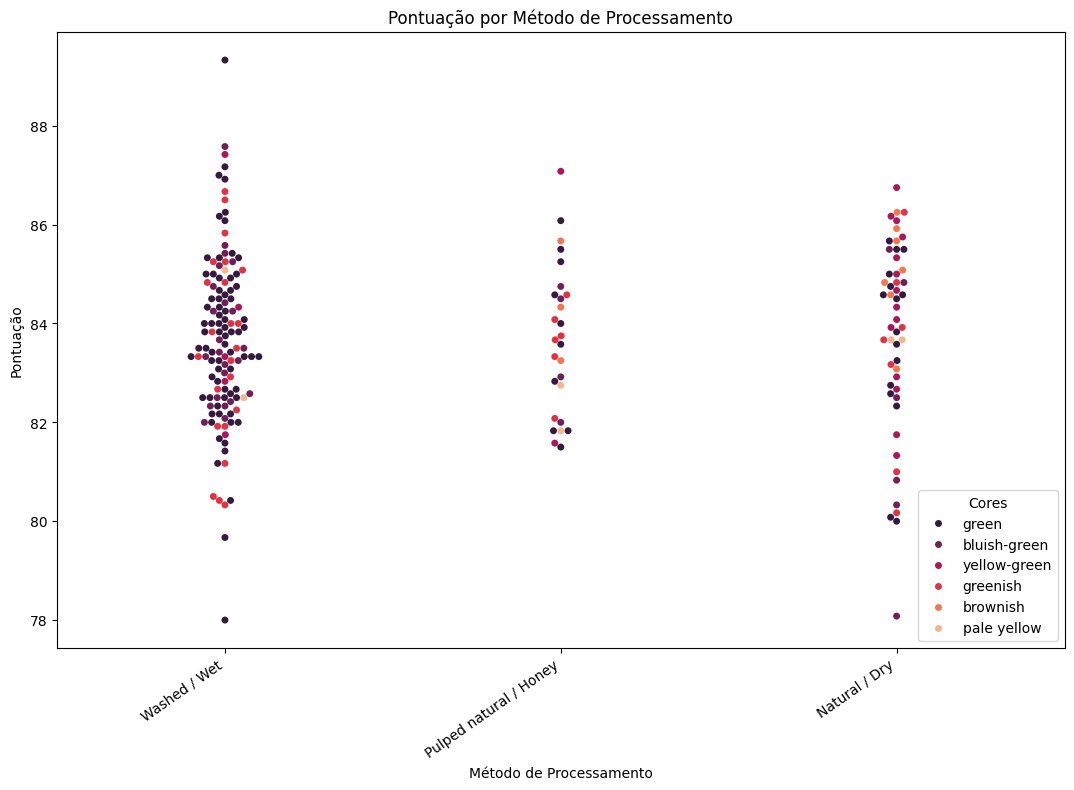

In [37]:
plt.figure(figsize=(13, 8))

sns.swarmplot(
    x=df_coffee['Processing Method'],
    y=df_coffee['Total Cup Points'],
    hue=df_coffee['Color'],
    size=5,
    palette='rocket',
)

plt.title('Pontuação por Método de Processamento')
plt.xlabel('Método de Processamento')
plt.ylabel('Pontuação')
plt.legend(title='Cores', loc='lower right')
plt.xticks(rotation=35, ha='right')
plt.show()

In [38]:
df_mean_altitude = df_coffee.groupby('Country of Origin')['Altitude'].mean().reset_index()

mean_altitude_by_country = px.choropleth(
    df_mean_altitude,
    locations='Country of Origin',
    locationmode='country names',
    color='Altitude',
    hover_name='Country of Origin',
    color_continuous_scale=px.colors.sequential.Plasma,
    title='Altitude Média por País',
)

mean_altitude_by_country.show()

# 4. Aplicando alguns modelos

### 4.1 Pré-Processando os dados

In [39]:
from sklearn.preprocessing import StandardScaler

In [40]:
df_coffee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Country of Origin     207 non-null    object 
 1   Farm Name             205 non-null    object 
 2   Company               207 non-null    object 
 3   Altitude              207 non-null    float64
 4   Region                205 non-null    object 
 5   Variety               201 non-null    object 
 6   Status                207 non-null    object 
 7   Processing Method     207 non-null    object 
 8   Aroma                 207 non-null    float64
 9   Flavor                207 non-null    float64
 10  Aftertaste            207 non-null    float64
 11  Acidity               207 non-null    float64
 12  Body                  207 non-null    float64
 13  Balance               207 non-null    float64
 14  Uniformity            207 non-null    float64
 15  Clean Cup             2

In [41]:
category_columns = ['Processing Method']
numerical_columns = ['Altitude', 'Aroma',
                    'Flavor', 'Aftertaste',
                    'Acidity', 'Body',
                    'Balance', 'Uniformity',
                    'Overall', 'Total Cup Points',
                    'Moisture Percentage',
                    'Category One Defects',
                    'Quakers', 'Category Two Defects']

informational_columns = ['Country of Origin', 'Farm Name',
                        'Company', 'Region', 'Variety',
                        'Initial Harvest Year',
                        'Final Harvest Year', 'Color']
drop_columns = ['Status', 'Defects','Clean Cup', 'Sweetness',]

drop_columns.extend(informational_columns)
drop_columns

['Status',
 'Defects',
 'Clean Cup',
 'Sweetness',
 'Country of Origin',
 'Farm Name',
 'Company',
 'Region',
 'Variety',
 'Initial Harvest Year',
 'Final Harvest Year',
 'Color']

In [42]:
data = df_coffee.drop(drop_columns, axis=1)
dummy_variables = pd.get_dummies(data, columns=category_columns, drop_first=False)

dummy_variables.T

,0,1,2,3,4,5,6,7,8,9,...,197,198,199,200,201,202,203,204,205,206
Altitude,1815.0,1200.0,1300.0,1900.0,1975.0,1668.0,1250.0,1200.0,1250.0,1550.0,...,1000.0,1600.0,1600.0,1300.0,1200.0,950.0,1200.0,1300.0,1200.0,975.0
Aroma,8.58,8.5,8.33,8.08,8.33,8.33,8.33,8.25,8.08,8.08,...,7.42,7.25,7.5,7.08,7.25,7.17,7.33,7.25,6.5,7.25
Flavor,8.5,8.5,8.42,8.17,8.33,8.33,8.17,8.25,8.08,8.17,...,7.17,7.25,7.25,7.25,7.17,7.17,7.08,7.17,6.75,7.08
Aftertaste,8.42,7.92,8.08,8.17,8.08,8.25,8.08,8.17,8.25,8.08,...,7.0,7.17,7.17,7.08,7.17,6.92,6.75,7.08,6.75,6.67
Acidity,8.58,8.0,8.17,8.25,8.25,7.83,8.0,8.0,8.08,8.17,...,7.08,7.33,7.17,7.42,7.08,7.17,7.17,7.0,7.17,6.83
Body,8.25,7.92,7.92,8.17,7.92,7.83,7.83,7.92,7.92,8.0,...,7.42,7.0,7.17,7.42,7.17,7.42,7.42,7.08,7.08,6.83
Balance,8.42,8.25,8.17,8.08,7.92,8.17,8.25,8.08,8.0,8.0,...,7.17,7.17,7.08,7.08,7.17,7.17,7.17,7.08,7.0,6.67
Uniformity,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,...,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0
Overall,8.58,8.5,8.33,8.25,8.25,8.25,8.25,8.08,8.25,8.0,...,7.17,7.25,7.0,7.0,7.17,7.08,7.08,7.0,6.83,6.67
Total Cup Points,89.33,87.58,87.42,87.17,87.08,87.0,86.92,86.75,86.67,86.5,...,80.42,80.42,80.33,80.33,80.17,80.08,80.0,79.67,78.08,78.0


In [43]:
scaler = StandardScaler()

scaled_numerial = scaler.fit_transform(data[numerical_columns])

df_scaled_num = pd.DataFrame(scaled_numerial, columns=numerical_columns)
df_scaled_num

,Altitude,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Overall,Total Cup Points,Moisture Percentage,Category One Defects,Quakers,Category Two Defects
0,0.698526,2.993534,2.707661,2.980060,3.436732,2.614819,3.034825,0.093753,2.955285,3.257632,0.855585,-0.229016,-0.410510,0.254427
1,-0.157627,2.714721,2.707661,1.163485,1.196334,1.198113,2.369929,0.093753,2.693520,2.243864,-0.189052,-0.229016,-0.410510,-0.764924
2,-0.018416,2.122244,2.420858,1.744789,1.853003,1.198113,2.057037,0.093753,2.137270,2.151176,-0.269408,-0.229016,-0.410510,-0.085356
3,0.816856,1.250954,1.524596,2.071773,2.162023,2.271375,1.705034,0.093753,1.875506,2.006352,0.855585,-0.229016,-0.410510,-0.764924
4,0.921265,2.122244,2.098204,1.744789,2.162023,1.198113,1.079250,0.093753,1.875506,1.954216,0.694872,-0.229016,0.777959,-0.085356
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,-0.505657,-1.920542,-2.060448,-2.469664,-2.009752,-0.948411,-1.854111,0.093753,-1.952802,-2.100859,0.534158,-0.229016,-0.410510,0.594211
203,-0.157627,-1.362917,-2.383102,-3.087299,-2.009752,-0.948411,-1.854111,0.093753,-1.952802,-2.147202,-0.269408,-0.229016,0.777959,3.312481
204,-0.018416,-1.641729,-2.060448,-1.888360,-2.666420,-2.408048,-2.206115,0.093753,-2.214567,-2.338370,0.694872,-0.229016,4.937598,2.972698
205,-0.157627,-4.255600,-3.566167,-3.087299,-2.009752,-2.408048,-2.519006,0.093753,-2.770817,-3.259451,0.212732,-0.229016,6.720300,3.652265


In [44]:
dummy_df = dummy_variables.drop(numerical_columns, axis=1)
dummy_df

,Processing Method_Natural / Dry,Processing Method_Pulped natural / Honey,Processing Method_Washed / Wet
0,False,False,True
1,False,False,True
2,False,False,True
3,False,False,True
4,False,True,False
...,...,...,...
202,True,False,False
203,True,False,False
204,False,False,True
205,True,False,False


In [45]:
df_proc = pd.concat([dummy_df, df_scaled_num], axis=1)
df_proc

,Processing Method_Natural / Dry,Processing Method_Pulped natural / Honey,Processing Method_Washed / Wet,Altitude,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Overall,Total Cup Points,Moisture Percentage,Category One Defects,Quakers,Category Two Defects
0,False,False,True,0.698526,2.993534,2.707661,2.980060,3.436732,2.614819,3.034825,0.093753,2.955285,3.257632,0.855585,-0.229016,-0.410510,0.254427
1,False,False,True,-0.157627,2.714721,2.707661,1.163485,1.196334,1.198113,2.369929,0.093753,2.693520,2.243864,-0.189052,-0.229016,-0.410510,-0.764924
2,False,False,True,-0.018416,2.122244,2.420858,1.744789,1.853003,1.198113,2.057037,0.093753,2.137270,2.151176,-0.269408,-0.229016,-0.410510,-0.085356
3,False,False,True,0.816856,1.250954,1.524596,2.071773,2.162023,2.271375,1.705034,0.093753,1.875506,2.006352,0.855585,-0.229016,-0.410510,-0.764924
4,False,True,False,0.921265,2.122244,2.098204,1.744789,2.162023,1.198113,1.079250,0.093753,1.875506,1.954216,0.694872,-0.229016,0.777959,-0.085356
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,True,False,False,-0.505657,-1.920542,-2.060448,-2.469664,-2.009752,-0.948411,-1.854111,0.093753,-1.952802,-2.100859,0.534158,-0.229016,-0.410510,0.594211
203,True,False,False,-0.157627,-1.362917,-2.383102,-3.087299,-2.009752,-0.948411,-1.854111,0.093753,-1.952802,-2.147202,-0.269408,-0.229016,0.777959,3.312481
204,False,False,True,-0.018416,-1.641729,-2.060448,-1.888360,-2.666420,-2.408048,-2.206115,0.093753,-2.214567,-2.338370,0.694872,-0.229016,4.937598,2.972698
205,True,False,False,-0.157627,-4.255600,-3.566167,-3.087299,-2.009752,-2.408048,-2.519006,0.093753,-2.770817,-3.259451,0.212732,-0.229016,6.720300,3.652265


In [46]:
df_proc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 17 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Processing Method_Natural / Dry           207 non-null    bool   
 1   Processing Method_Pulped natural / Honey  207 non-null    bool   
 2   Processing Method_Washed / Wet            207 non-null    bool   
 3   Altitude                                  207 non-null    float64
 4   Aroma                                     207 non-null    float64
 5   Flavor                                    207 non-null    float64
 6   Aftertaste                                207 non-null    float64
 7   Acidity                                   207 non-null    float64
 8   Body                                      207 non-null    float64
 9   Balance                                   207 non-null    float64
 10  Uniformity                            

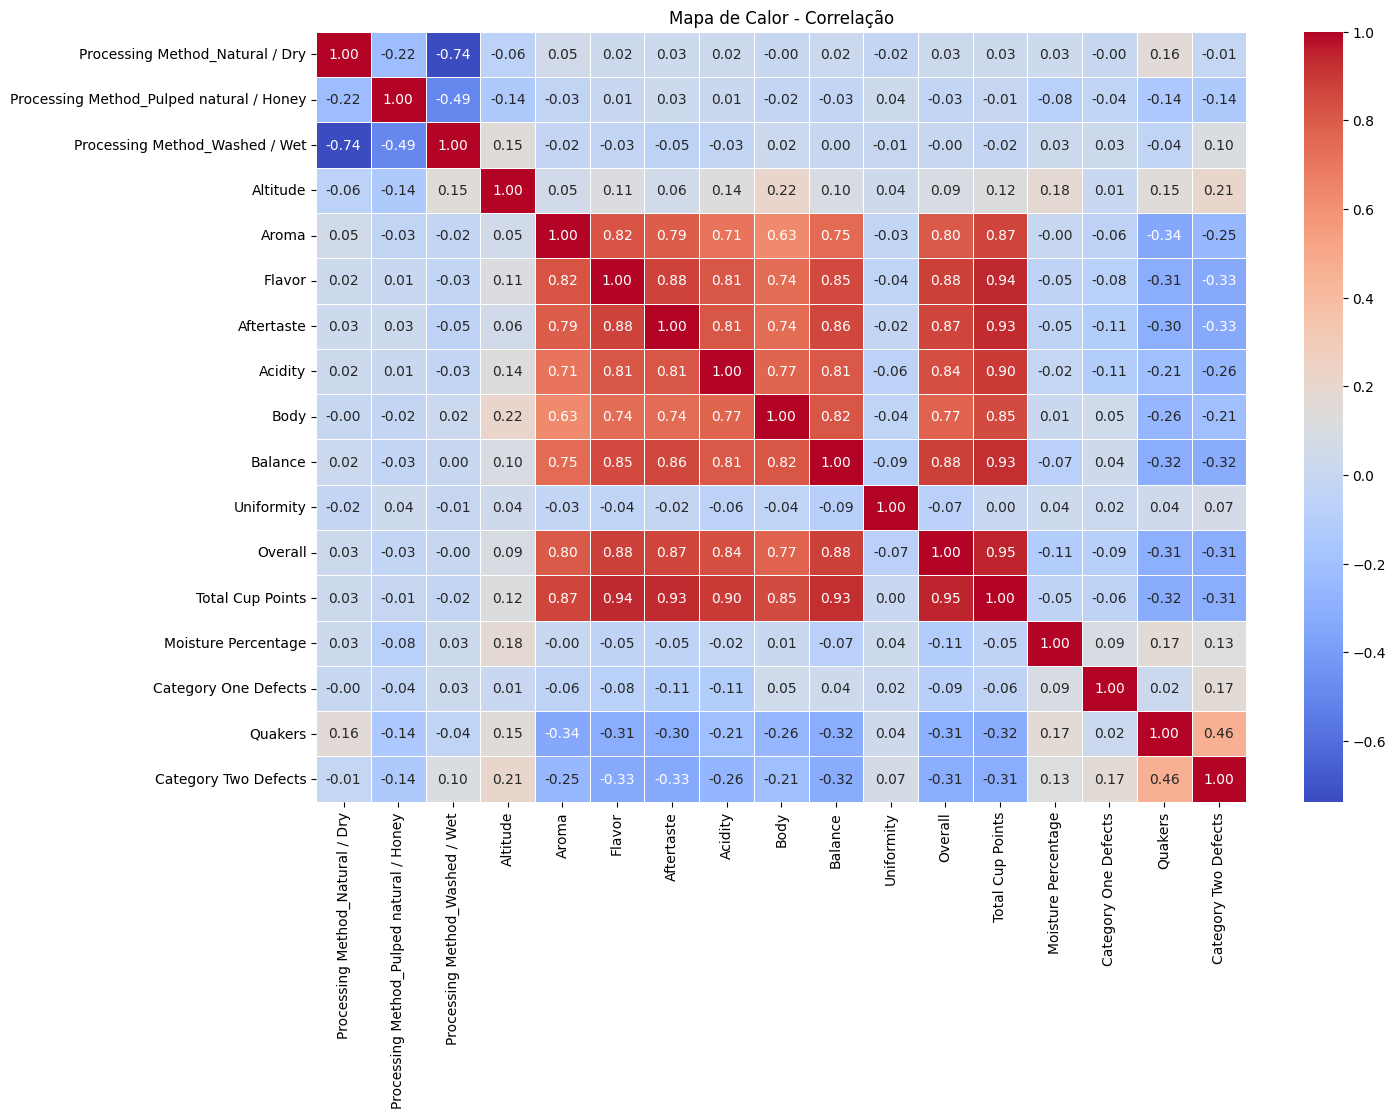

In [47]:
corr_mtx = df_proc.corr()

plt.figure(figsize=(15, 10))
sns.heatmap(corr_mtx, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title('Mapa de Calor - Correlação')
plt.show()

In [48]:
alti_acid_sctr = px.scatter(
    df_coffee,
    x='Acidity',
    y='Altitude',
    color='Total Cup Points',
    hover_data='Processing Method'
)

alti_acid_sctr.show()

In [49]:
alti_acid_sctr = px.scatter(
    df_coffee,
    x='Body',
    y='Altitude',
    color='Total Cup Points',
    hover_data='Processing Method'
)

alti_acid_sctr.show()

## 4.2. Preparando as análises

In [50]:
evaluation_columns = [
    # 'Aroma',
    # 'Flavor',
    # 'Aftertaste',
    # 'Acidity',
    # 'Body',
    'Balance',
    'Uniformity',
    'Overall',
]
target = ['Total Cup Points']
drop_columns = target

X = df_proc.drop(columns=drop_columns)
y = df_coffee[target]
y

,Total Cup Points
0,89.33
1,87.58
2,87.42
3,87.17
4,87.08
...,...
202,80.08
203,80.00
204,79.67
205,78.08


### 4.2.1. Discretizando a "Pontuação"

Dessa forma, permitindo aplicar um modelo de classificação.

In [51]:
df_coffee['Total Cup Points'].unique()

array([89.33, 87.58, 87.42, 87.17, 87.08, 87.  , 86.92, 86.75, 86.67,
       86.5 , 86.25, 86.17, 86.08, 85.92, 85.83, 85.75, 85.67, 85.58,
       85.5 , 85.42, 85.33, 85.25, 85.17, 85.08, 85.  , 84.92, 84.83,
       84.75, 84.67, 84.58, 84.5 , 84.42, 84.33, 84.25, 84.17, 84.08,
       84.  , 83.92, 83.83, 83.75, 83.67, 83.58, 83.5 , 83.42, 83.33,
       83.25, 83.17, 83.08, 83.  , 82.92, 82.83, 82.75, 82.67, 82.58,
       82.5 , 82.42, 82.33, 82.25, 82.17, 82.08, 82.  , 81.92, 81.83,
       81.75, 81.67, 81.58, 81.5 , 81.42, 81.33, 81.17, 81.  , 80.83,
       80.5 , 80.42, 80.33, 80.17, 80.08, 80.  , 79.67, 78.08, 78.  ])

In [52]:
df_coffee['Total Cup Points'].describe()

count    207.000000
mean      83.706570
std        1.730417
min       78.000000
25%       82.580000
50%       83.750000
75%       84.830000
max       89.330000
Name: Total Cup Points, dtype: float64

In [53]:
quantiles = y.quantile([.25, .5, .75])
qs = quantiles['Total Cup Points'].to_list()
qs

[82.58, 83.75, 84.83]

In [54]:
qs = [0] + qs + [100]
qs

[0, 82.58, 83.75, 84.83, 100]

In [55]:
y_quant = pd.cut(y['Total Cup Points'], bins=qs, labels=['D', 'C', 'B', 'A'])
y_quant

0      A
1      A
2      A
3      A
4      A
      ..
202    D
203    D
204    D
205    D
206    D
Name: Total Cup Points, Length: 207, dtype: category
Categories (4, object): ['D' < 'C' < 'B' < 'A']

In [56]:
y_quant.value_counts(normalize=True)

Total Cup Points
D    0.260870
B    0.256039
C    0.241546
A    0.241546
Name: proportion, dtype: float64

### 4.2.2. Divisão de Treino e Teste

In [57]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y_quant, test_size=0.3, random_state=42)

### 4.2.3. Criação do Modelo Inicial

In [58]:
from sklearn.metrics import classification_report

In [59]:
from sklearn.linear_model import LogisticRegression

In [60]:
model = LogisticRegression(max_iter=1_000_000)

model.fit(X_train, y_train)

LogisticRegression(max_iter=1000000)

In [61]:
y_pred = model.predict(X_test)
y_pred

array(['C', 'A', 'B', 'B', 'D', 'A', 'C', 'C', 'A', 'C', 'D', 'A', 'D',
       'D', 'C', 'D', 'D', 'D', 'C', 'B', 'C', 'D', 'C', 'B', 'B', 'A',
       'B', 'A', 'C', 'D', 'D', 'B', 'B', 'C', 'D', 'C', 'C', 'D', 'A',
       'C', 'B', 'D', 'B', 'D', 'B', 'B', 'D', 'D', 'A', 'A', 'B', 'D',
       'A', 'A', 'A', 'B', 'D', 'C', 'A', 'C', 'B', 'C', 'C'],
      dtype=object)

In [62]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           A       0.92      1.00      0.96        12
           B       1.00      0.79      0.88        19
           C       0.71      0.92      0.80        13
           D       0.94      0.89      0.92        19

    accuracy                           0.89        63
   macro avg       0.89      0.90      0.89        63
weighted avg       0.91      0.89      0.89        63



In [63]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

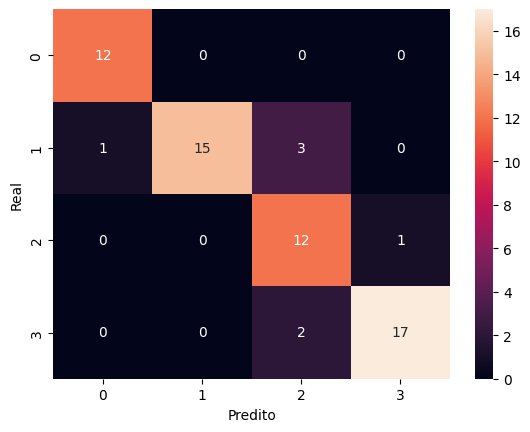

In [64]:
matrix = confusion_matrix(y_test, y_pred)

sns.heatmap(matrix, annot=True)
plt.ylabel('Real')
plt.xlabel('Predito')

plt.show()


In [65]:
from sklearn.tree import DecisionTreeClassifier

In [66]:
model = DecisionTreeClassifier(max_depth=8, random_state=42)

model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=8, random_state=42)

In [67]:
y_pred = model.predict(X_test)
y_pred

array(['D', 'A', 'B', 'B', 'D', 'A', 'B', 'C', 'A', 'D', 'D', 'A', 'D',
       'D', 'C', 'D', 'C', 'D', 'C', 'B', 'C', 'D', 'B', 'C', 'B', 'A',
       'B', 'A', 'D', 'C', 'C', 'B', 'B', 'C', 'D', 'B', 'C', 'D', 'A',
       'C', 'B', 'D', 'B', 'D', 'A', 'B', 'D', 'D', 'A', 'A', 'B', 'D',
       'A', 'A', 'A', 'B', 'D', 'C', 'A', 'C', 'B', 'C', 'C'],
      dtype=object)

In [68]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           A       0.86      1.00      0.92        12
           B       0.94      0.79      0.86        19
           C       0.60      0.69      0.64        13
           D       0.83      0.79      0.81        19

    accuracy                           0.81        63
   macro avg       0.81      0.82      0.81        63
weighted avg       0.82      0.81      0.81        63



In [69]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

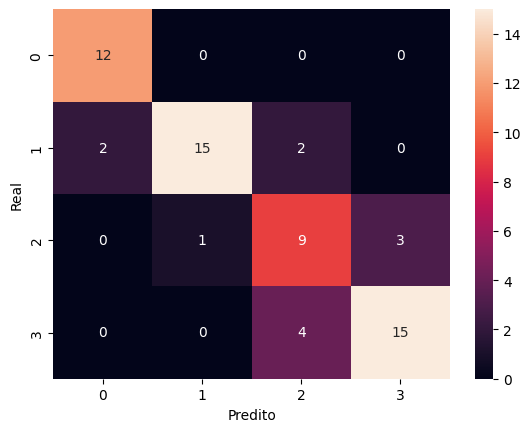

In [70]:
matrix = confusion_matrix(y_test, y_pred)

sns.heatmap(matrix, annot=True)
plt.ylabel('Real')
plt.xlabel('Predito')

plt.show()

In [71]:
from sklearn.ensemble import RandomForestClassifier

In [72]:
model = RandomForestClassifier(random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_pred

array(['C', 'A', 'B', 'B', 'D', 'A', 'B', 'C', 'A', 'D', 'D', 'A', 'D',
       'D', 'C', 'D', 'D', 'D', 'C', 'B', 'C', 'D', 'B', 'C', 'B', 'A',
       'B', 'A', 'C', 'D', 'D', 'B', 'B', 'C', 'C', 'B', 'C', 'D', 'A',
       'C', 'B', 'D', 'B', 'D', 'B', 'B', 'D', 'D', 'A', 'A', 'B', 'D',
       'A', 'A', 'A', 'B', 'D', 'D', 'A', 'C', 'B', 'C', 'C'],
      dtype=object)

In [73]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           A       0.92      1.00      0.96        12
           B       0.94      0.84      0.89        19
           C       0.79      0.85      0.81        13
           D       0.95      0.95      0.95        19

    accuracy                           0.90        63
   macro avg       0.90      0.91      0.90        63
weighted avg       0.91      0.90      0.90        63



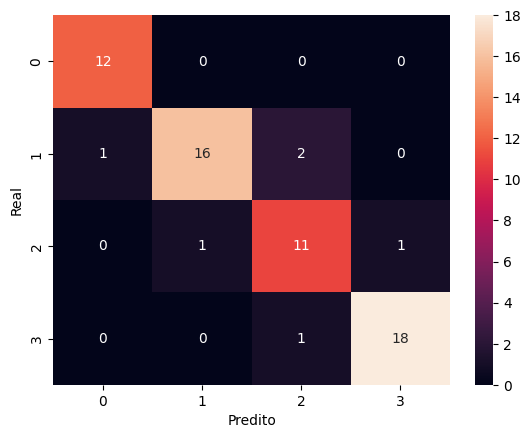

In [74]:
matrix = confusion_matrix(y_test, y_pred)

sns.heatmap(matrix, annot=True)
plt.ylabel('Real')
plt.xlabel('Predito')

plt.show()

In [75]:
from sklearn.ensemble import AdaBoostClassifier

In [76]:
model = AdaBoostClassifier(random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_pred

c:\DEV-GIT\STUDY\ada-data-science\ada-data-science-projects\ada-ds-ml1\.venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.



array(['C', 'B', 'B', 'B', 'C', 'B', 'B', 'C', 'B', 'C', 'C', 'B', 'C',
       'D', 'C', 'D', 'C', 'D', 'C', 'B', 'C', 'D', 'C', 'C', 'B', 'B',
       'B', 'B', 'C', 'D', 'D', 'B', 'B', 'C', 'C', 'B', 'C', 'D', 'B',
       'C', 'B', 'D', 'C', 'D', 'B', 'B', 'D', 'D', 'B', 'B', 'B', 'D',
       'B', 'B', 'B', 'C', 'D', 'C', 'B', 'C', 'B', 'D', 'C'],
      dtype=object)

In [77]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           A       0.00      0.00      0.00        12
           B       0.56      0.79      0.65        19
           C       0.55      0.92      0.69        13
           D       0.93      0.68      0.79        19

    accuracy                           0.63        63
   macro avg       0.51      0.60      0.53        63
weighted avg       0.56      0.63      0.58        63



c:\DEV-GIT\STUDY\ada-data-science\ada-data-science-projects\ada-ds-ml1\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\DEV-GIT\STUDY\ada-data-science\ada-data-science-projects\ada-ds-ml1\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\DEV-GIT\STUDY\ada-data-science\ada-data-science-projects\ada-ds-ml1\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



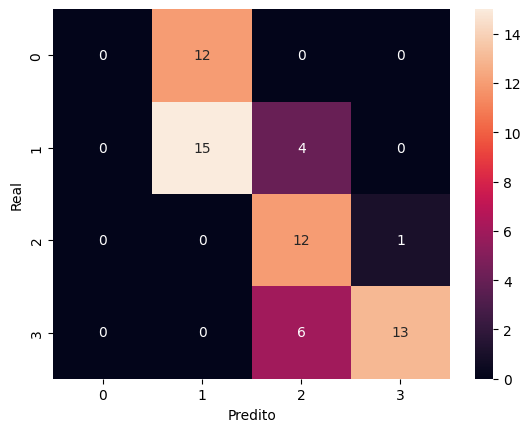

In [78]:
matrix = confusion_matrix(y_test, y_pred)

sns.heatmap(matrix, annot=True)
plt.ylabel('Real')
plt.xlabel('Predito')

plt.show()

In [79]:
from sklearn.ensemble import GradientBoostingClassifier

In [80]:
model = GradientBoostingClassifier(random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_pred

array(['C', 'A', 'B', 'B', 'D', 'A', 'B', 'C', 'A', 'D', 'D', 'A', 'D',
       'D', 'C', 'D', 'C', 'D', 'B', 'B', 'C', 'D', 'C', 'C', 'B', 'A',
       'B', 'A', 'D', 'D', 'D', 'B', 'B', 'C', 'D', 'B', 'C', 'D', 'A',
       'C', 'B', 'D', 'B', 'D', 'B', 'B', 'D', 'D', 'B', 'A', 'B', 'D',
       'A', 'A', 'A', 'B', 'D', 'C', 'A', 'C', 'B', 'C', 'C'],
      dtype=object)

In [81]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           A       0.92      0.92      0.92        12
           B       0.94      0.89      0.92        19
           C       0.71      0.77      0.74        13
           D       0.84      0.84      0.84        19

    accuracy                           0.86        63
   macro avg       0.85      0.86      0.85        63
weighted avg       0.86      0.86      0.86        63



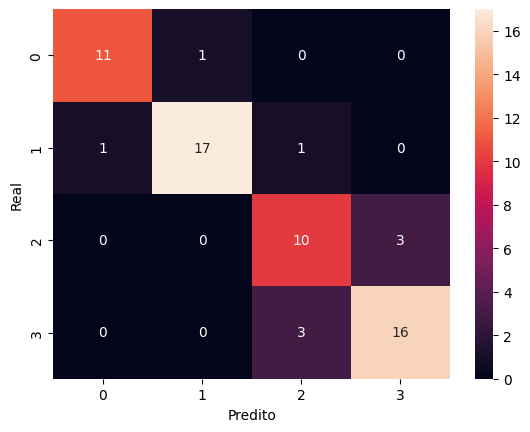

In [82]:
matrix = confusion_matrix(y_test, y_pred)

sns.heatmap(matrix, annot=True)
plt.ylabel('Real')
plt.xlabel('Predito')

plt.show()

# 5. Respondendo às perguntas